## 1. Data Processing and Collection

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import webcolors

In [2]:
def plot_grid(grid):
    plt.imshow(grid)
    plt.show()

In [3]:
def get_grid(path):
    im = mpimg.imread(path)
    
    (width, height) = im.shape[0:2]
    increment = width//8
    
    grid = np.zeros((8,8,3), dtype = 'uint8')

    for r in range(8):
        row = r*increment
        for c in range(8):
            column = c*increment
            subset = im[column:(column + increment), row:(row + increment),]
            grid[c, r, :] = np.median(subset, axis = (0,1))
    
    return(grid)

In [4]:
image_paths = [path for path in os.listdir("images/") if path.startswith("IMG")]
data = []
for path in image_paths:
    data.append(get_grid("images/" + path))

In [30]:
np.random.seed(0)
np.random.shuffle(restructured_data)
NUM_TRAIN = 20
train_data = restructured_data[0:NUM_TRAIN]
test_data = restructured_data[NUM_TRAIN:]

In [5]:
data = np.array(data)
restructured_data = np.reshape(data, (data.shape[0], 64, 3))

In [43]:
np.random.seed(19)
ind = np.array(list(range(0, data.shape[0])))
np.random.shuffle(ind)

NUM_TRAIN = 20
train_data = restructured_data[ind[0:NUM_TRAIN]]
test_data = restructured_data[ind[NUM_TRAIN:]]

### Data Annotation

This simple algorithm will reduce the amount of manual input I need to perform.

In [45]:
def pretty_print(matrix):
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))

In [46]:
def get_colour_name(rgb_triplet):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

In [47]:
color_dict = {"khaki": "ye", "wheat": "wh", "tan": "wh", "mediumseagreen": "dg", 
              "seagreen": "dg", "indianred": "pi", "lightgreen": "lg",
              "dimgrey": "pu", "steelblue": "bl", "darkolivegreen": "br", 
             "chocolate": "or", "darkkhaki": "lg", "mediumaquamarine": "te", "cadetblue": "te",
             "crimson": "pi", "rosybrown": "pu", "grey": "pu"}

In [48]:
def get_colors(grid, color_dict):
    # names = np.zeros((8,8), dtype = object)
    ournames = np.zeros((8,8), dtype = object)
    for r in range(8):
        for c in range(8):
            color = get_colour_name(grid[r,c])
            # names[r,c] = color
            ournames[r,c] = color_dict.get(color, "UNK")
    return(ournames)

UNK	UNK	lg 	dg 	dg 	dg 	pi 	pi
UNK	te 	UNK	dg 	dg 	pu 	pi 	pi
te 	te 	or 	dg 	pu 	UNK	UNK	pi
te 	te 	or 	or 	UNK	UNK	UNK	pi
pu 	UNK	UNK	UNK	UNK	UNK	or 	or
pu 	bl 	bl 	bl 	UNK	wh 	or 	or
pu 	pu 	pu 	bl 	UNK	wh 	or 	or
pu 	pu 	pu 	bl 	bl 	bl 	or 	or
UNK,UNK,lg,dg,dg,dg,pi,pi,UNK,te,UNK,dg,dg,pu,pi,pi,te,te,or,dg,pu,UNK,UNK,pi,te,te,or,or,UNK,UNK,UNK,pi,pu,UNK,UNK,UNK,UNK,UNK,or,or,pu,bl,bl,bl,UNK,wh,or,or,pu,pu,pu,bl,UNK,wh,or,or,pu,pu,pu,bl,bl,bl,or,or


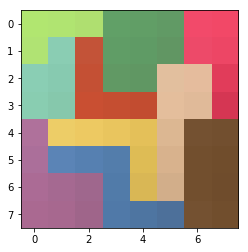

correct it >> lg,lg,lg,dg,dg,dg,pi,pi,lg,te,or,dg,dg,dg,pi,pi,te,te,or,dg,dg,wh,wh,pi,te,te,or,or,or,wh,wh,pi,pu,ye,ye,ye,ye,wh,br,br,pu,bl,bl,bl,ye,wh,br,br,pu,pu,pu,bl,ye,wh,br,br,pu,pu,pu,bl,bl,bl,br,br
UNK	UNK	lg 	dg 	dg 	dg 	pi 	pi
UNK	te 	UNK	dg 	dg 	pu 	pi 	pi
te 	te 	or 	dg 	pu 	UNK	UNK	pi
te 	te 	or 	or 	UNK	UNK	UNK	pi
pu 	UNK	UNK	UNK	UNK	UNK	or 	or
pu 	bl 	bl 	bl 	UNK	wh 	or 	or
pu 	pu 	pu 	bl 	UNK	wh 	or 	or
pu 	pu 	pu 	bl 	bl 	bl 	or 	or
UNK,UNK,lg,dg,dg,dg,pi,pi,UNK,te,UNK,dg,dg,pu,pi,pi,te,te,or,dg,pu,UNK,UNK,pi,te,te,or,or,UNK,UNK,UNK,pi,pu,UNK,UNK,UNK,UNK,UNK,or,or,pu,bl,bl,bl,UNK,wh,or,or,pu,pu,pu,bl,UNK,wh,or,or,pu,pu,pu,bl,bl,bl,or,or


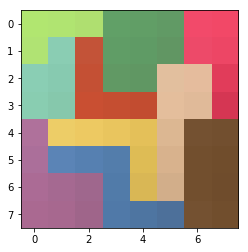

KeyboardInterrupt: 

In [52]:
# annotated the first one but then realized an error - gotta annotate 19 more

truth = []
for item in train_data:
    grid = np.reshape(item, (8,8,3))
    colors = get_colors(grid, color_dict)
    pretty_print(colors)
    c2 = list(colors.reshape(64))
    print(",".join(c2))
    plot_grid(grid)
    correct = input("correct it >> ")
    truth.append(correct.split(","))

In [ ]:
grid1 = np.reshape(train_data[0], (8,8,3))
plot_grid(grid1)

In [ ]:
grid1 = get_grid("images/IMG_0387.jpg")
plot_grid(grid1)

In [ ]:
grid2 = get_grid("images/IMG_0388.jpg")
plot_grid(grid2)

In [ ]:
grid3 = get_grid("images/IMG_0389.jpg")
plot_grid(grid3)